In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, display
from multiprocessing import Pool

import os

# Julia Set

In [5]:
sample_path = "pattern_samples/"

In [6]:
temp_frames_path = "frames_temp/"

In [7]:
def julia(c, max_iter=500, bound=2):
    """ Generate a Julia set of geometry for a given complex number c. """
    x = np.linspace(-1.5, 1.5, 800)
    y = np.linspace(-1.5, 1.5, 800)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    img = np.zeros(Z.shape, dtype=int)
    for n in range(max_iter):
        mask = np.abs(Z) < bound
        Z[mask] = Z[mask]**2 + c
        img[mask] += 1

    return img

*Adjust these values to change the trajectory of Julia set* 

In [11]:
# List of c values to animate
c_values = np.linspace(-0.8, 0.8, num=80) + 0.6j  

# Creating the frames
frames = []
file_names = []
for c in c_values:
    img = julia(c)
    plt.figure(figsize=(8, 8), frameon=False)
    plt.imshow(img, cmap='hot', extent=(-1.5, 1.5, -1.5, 1.5))
    plt.axis('off')  # Hide axes
    filename = f'{temp_frames_path}frame_{c}.png'
    file_names.append(filename)
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    frames.append(imageio.imread(filename))

gif_filename = sample_path + 'julia_set_variation.gif'  # Create GIF
imageio.mimsave(gif_filename, frames, fps=1, loop=0)

/tmp/ipykernel_170630/2130310661.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


In [12]:
for frame in file_names:
    os.remove(frame)  # Delete the file

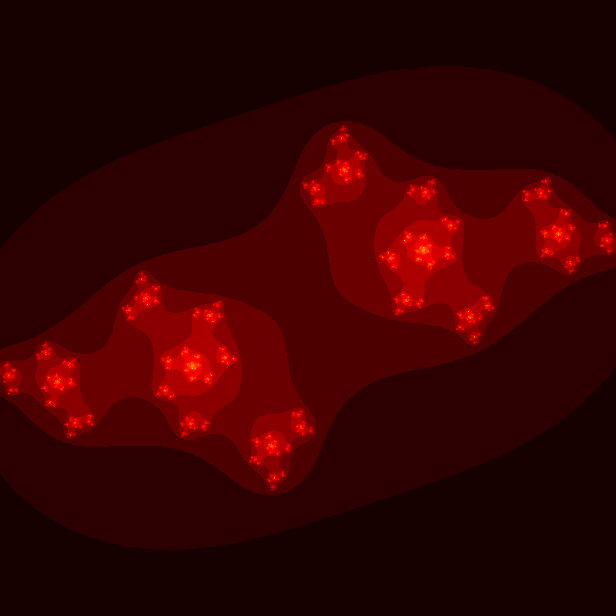

In [13]:
display(Image(filename=sample_path + 'julia_set_variation.gif'))